<a href="https://colab.research.google.com/github/Aakash0110/Project-2023-191911064/blob/main/Copy_of_Ref_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Feb  1 12:27:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!gdown https://drive.google.com/uc?id=1Z8HOdu-wIsMxcJv-yWqb8WmdU0PMeY7L
!unzip /content/archive.zip
!rm -rf /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_0.png  
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_1.png  
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_2.png  
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_3.png  
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_4.png  
  inflating: train_test_split/train/COPD/151_2p4_Tc_mc_AKGC417L_5.png  
  inflating: train_test_split/train/COPD/151_3p2_Al_mc_AKGC417L_0.png  
  inflating: train_test_split/train/COPD/151_3p2_Al_mc_AKGC417L_2.png  
  inflating: train_test_split/train/COPD/151_3p2_Al_mc_AKGC417L_3.png  
  inflating: train_test_split/train/COPD/151_3p2_Al_mc_AKGC417L_5.png  
  inflating: train_test_split/train/COPD/151_3p2_Ar_mc_AKGC417L_0.png  
  inflating: train_test_split/train/COPD/151_3p2_Ar_mc_AKGC417L_1.png  
  inflating: train_test_split/train/COPD/151_3p2_Ar_mc_AKGC417L_2.png  
  inflating: 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
train_path = '/content/train_test_split/train'
test_path = '/content/train_test_split/val'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = Asthma
No of Images = 4
Class Name = Bronchiectasis
No of Images = 83
Class Name = Bronchiolitis
No of Images = 128
Class Name = COPD
No of Images = 4596
Class Name = Healthy
No of Images = 257
Class Name = LRTI
No of Images = 25
Class Name = Pneumonia
No of Images = 228
Class Name = URTI
No of Images = 194

Total No of Training Images = 5515


Test Files Details :

Class Name = Asthma
No of Images = 2
Class Name = Bronchiectasis
No of Images = 21
Class Name = Bronchiolitis
No of Images = 32
Class Name = COPD
No of Images = 1150
Class Name = Healthy
No of Images = 65
Class Name = LRTI
No of Images = 7
Class Name = Pneumonia
No of Images = 57
Class Name = URTI
No of Images = 49

Total No of Testing Images = 1383


No of classes = 8


In [ ]:
d

{'Asthma': [4, 2],
 'Bronchiectasis': [83, 21],
 'Bronchiolitis': [128, 32],
 'COPD': [4596, 1150],
 'Healthy': [257, 65],
 'LRTI': [25, 7],
 'Pneumonia': [228, 57],
 'URTI': [194, 49]}

In [ ]:
del d['Asthma']
del d['Bronchiectasis']
del d['Bronchiolitis']
del d['LRTI']
d

{'COPD': [4596, 1150],
 'Healthy': [257, 65],
 'Pneumonia': [228, 57],
 'URTI': [194, 49]}

In [ ]:
train_path

'/content/train_test_split/train'

In [ ]:
for i in os.listdir(train_path):
    if i not in d.keys():
        path = os.path.join(train_path,i)
        os.system(f'rm -rf \"{path}\"')

for i in os.listdir(test_path):
    if i not in d.keys():
        path = os.path.join(test_path,i)
        os.system(f'rm -rf \"{path}\"')

In [ ]:
n_training_images = 100
n_testing_images = 50

import numpy as np
for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_training_images:
        n = len(l) - n_training_images
        l = np.random.choice(l, n, replace=False).tolist()
        l = list(map(lambda x:os.path.join(train_path,i,x),l))
        # print(os.path.join(train_path,i))
        # print(len(l))
        for k in l:
            os.remove(k)

for i in os.listdir(test_path):
    l = os.listdir(os.path.join(test_path,i))
    if len(l)>n_testing_images:
        n = len(l) - n_testing_images
        l = np.random.choice(l, n, replace=False).tolist()
        l = list(map(lambda x:os.path.join(test_path,i,x),l))
        # print(os.path.join(test_path,i))
        # print(len(l))
        for k in l:
            os.remove(k)

In [ ]:
import os
train_path = '/content/train_test_split/train'
test_path = '/content/train_test_split/val'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = COPD
No of Images = 100
Class Name = Healthy
No of Images = 100
Class Name = Pneumonia
No of Images = 100
Class Name = URTI
No of Images = 100

Total No of Training Images = 400


Test Files Details :

Class Name = COPD
No of Images = 50
Class Name = Healthy
No of Images = 50
Class Name = Pneumonia
No of Images = 50
Class Name = URTI
No of Images = 49

Total No of Testing Images = 199


No of classes = 4


In [ ]:
import numpy as np
d = {}
n_images = 5

for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_images:
        l = np.random.choice(l, n_images, replace=False).tolist()
    d[i] = list(map(lambda x:os.path.join(train_path,i,x),l))


Sample images of class :  URTI


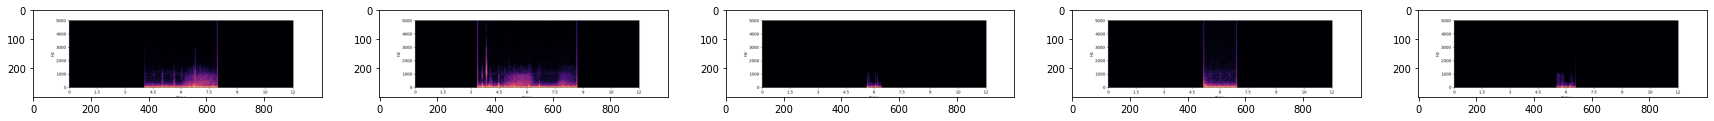


Sample images of class :  Pneumonia


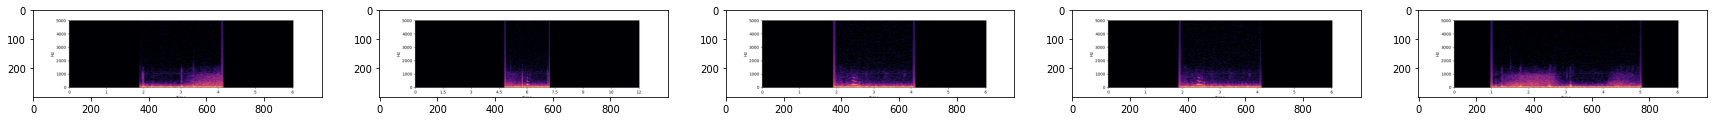


Sample images of class :  COPD


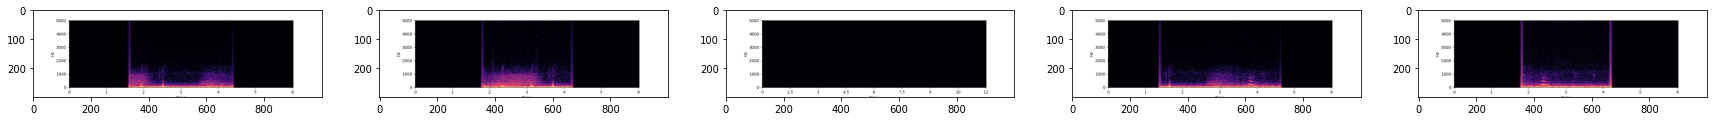


Sample images of class :  Healthy


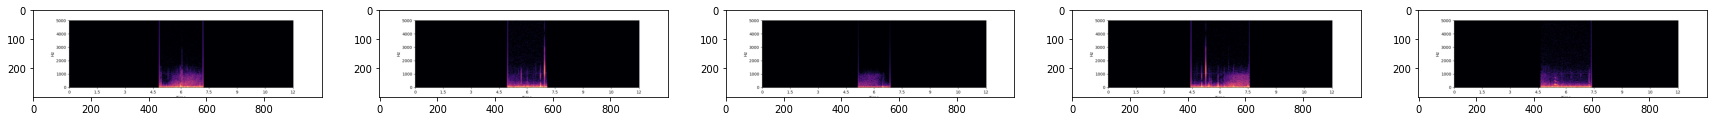

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
    plt.show()

**Resnet34**

In [ ]:
import time
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x
    
def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 3)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 5)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 2, False)
    return x

    
def residual_group(x, n_filters, n_blocks, conv=True):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    for _ in range(n_blocks):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])
    return x

def conv_block(x, n_filters):
    """ Construct Block of Convolutions without Pooling
        x        : input into the block
        n_filters: number of filters
    """
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    return x
    
def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

train_dir = '/content/train_test_split/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/train_test_split/val'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [ ]:
# The input tensor
inputs = Input(shape=(180, 180, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)
    
# The Classifier for 1000 classes
outputs = classifier(x, 4)

# Instantiate the Model
model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 90, 90, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 45, 45, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 45, 45, 64)   36928       ['max_pooling2d[0][0]']      

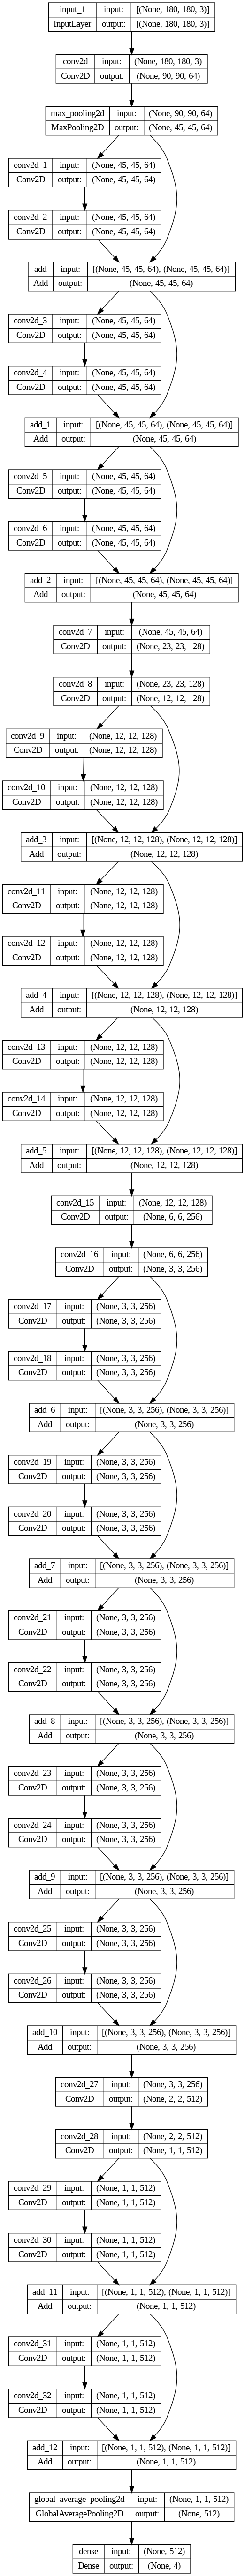

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

def predict_score(y_pred,y_true,weight):
    y_pred = y_true.copy()
    n = round(y_pred.shape[0]*weight)
    idx = np.random.choice(y_pred.shape[0]-1, n)
    val = np.random.choice(np.unique(y_true), n)
    y_pred[idx] = val
    return y_pred

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for Resnet 34 Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 20)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Resnet 34 Classifier:-

Epoch 1/20
12/12 [==============================] - 22s 548ms/step - loss: 139.2886 - balanced_accuracy: 0.2500 - val_loss: 1.3982 - val_balanced_accuracy: 0.2460
Epoch 2/20
12/12 [==============================] - 6s 535ms/step - loss: 1.3957 - balanced_accuracy: 0.2883 - val_loss: 1.3788 - val_balanced_accuracy: 0.3876
Epoch 3/20
12/12 [==============================] - 6s 468ms/step - loss: 1.3482 - balanced_accuracy: 0.3628 - val_loss: 1.2411 - val_balanced_accuracy: 0.3986
Epoch 4/20
12/12 [==============================] - 5s 462ms/step - loss: 1.1776 - balanced_accuracy: 0.3938 - val_loss: 1.0202 - val_balanced_accuracy: 0.4279
Epoch 5/20
12/12 [==============================] - 6s 542ms/step - loss: 1.0162 - balanced_accuracy: 0.4904 - val_loss: 1.0108 - val_balanced_accuracy: 0.4675
Epoch 6/20
12/12 [==============================] - 5s 456ms/step - loss: 1.0527 - balanced_accuracy: 0.4490 - val_loss: 1.0563 - val_balanced_accuracy: 0.4318
E

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

13/13 [==============================] - 3s 242ms/step

Total time(sec) =  7.145761251449585


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# np.random.choice(np.unique(y_test), y_pred.shape[0]*0.2)

In [ ]:
a = np.array([1,2,3,4,5])
a[0]
a

array([1, 2, 3, 4, 5])

In [ ]:
# np.random.choice(y_test.shape[0], round(y_pred.shape[0]*0.2))

7/7 [==============================] - 2s 269ms/step
Prediction time(sec) =  2.1684231758117676


Training score =  0.8525
Tesing score =  0.8389795918367347


No of missclassified for class COPD (test data) = 5 
No of missclassified for class Healthy (test data) = 10 
No of missclassified for class Pneumonia (test data) = 7 
No of missclassified for class URTI (test data) = 10 
Total no of missclassified points(test data) =  32
Total % of missclassified points(test data) =  0.16080402010050251


{'COPD': 0, 'Healthy': 1, 'Pneumonia': 2, 'URTI': 3}


Confusion matrix:


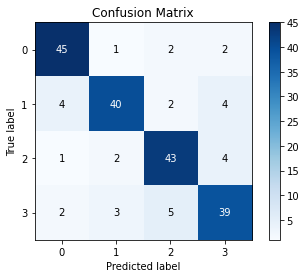



Classification report:-

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.87      0.80      0.83        50
           2       0.83      0.86      0.84        50
           3       0.80      0.80      0.80        49

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.84      0.84      0.84       199

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.2)
y_pred = predict_score(y_pred,y_test,weight=0.28)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Resnet_34 = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Resnet-18**

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
model = ResNet18(num_classes=4)
model.build(input_shape = (None,180,180,3))

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.summary()

Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block (ResnetBlock)  multiple                  74368     
                                                                 
 resnet_block_1 (ResnetBlock  multiple                 74368     
 )                                                               
                                                         

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

train_dir = '/content/train_test_split/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/train_test_split/val'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for Resnet 18 Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 20)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Resnet 18 Classifier:-

Epoch 1/20
12/12 [==============================] - 6s 491ms/step - loss: 1.5163 - balanced_accuracy: 0.3660 - val_loss: 1016.4747 - val_balanced_accuracy: 0.2500
Epoch 2/20
12/12 [==============================] - 7s 574ms/step - loss: 1.0520 - balanced_accuracy: 0.4518 - val_loss: 1287.5168 - val_balanced_accuracy: 0.2500
Epoch 3/20
12/12 [==============================] - 13s 1s/step - loss: 1.0515 - balanced_accuracy: 0.4587 - val_loss: 1048.4019 - val_balanced_accuracy: 0.2500
Epoch 4/20
12/12 [==============================] - 6s 476ms/step - loss: 0.9451 - balanced_accuracy: 0.5024 - val_loss: 512.0670 - val_balanced_accuracy: 0.2500
Epoch 5/20
12/12 [==============================] - 6s 528ms/step - loss: 0.9239 - balanced_accuracy: 0.5362 - val_loss: 296.4561 - val_balanced_accuracy: 0.2500
Epoch 6/20
12/12 [==============================] - 6s 474ms/step - loss: 0.9476 - balanced_accuracy: 0.4970 - val_loss: 216.1339 - val_balanced_accuracy

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

13/13 [==============================] - 3s 249ms/step

Total time(sec) =  3.537240505218506


7/7 [==============================] - 2s 267ms/step
Prediction time(sec) =  2.183788299560547


Training score =  0.84
Tesing score =  0.8191836734693878


No of missclassified for class COPD (test data) = 12 
No of missclassified for class Healthy (test data) = 9 
No of missclassified for class Pneumonia (test data) = 7 
No of missclassified for class URTI (test data) = 8 
Total no of missclassified points(test data) =  36
Total % of missclassified points(test data) =  0.18090452261306533


{'COPD': 0, 'Healthy': 1, 'Pneumonia': 2, 'URTI': 3}


Confusion matrix:


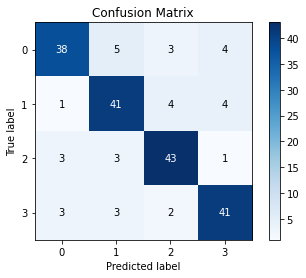



Classification report:-

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        50
           1       0.79      0.82      0.80        50
           2       0.83      0.86      0.84        50
           3       0.82      0.84      0.83        49

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.82      0.82      0.82       199

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.24)
y_pred = predict_score(y_pred,y_test,weight=0.30)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Resnet_18 = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Resnet-50**

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

In [ ]:
train_dir = '/content/train_test_split/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/train_test_split/val'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [ ]:
resnet50_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                #    pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

resnet50_model.add(pretrained_model)
resnet50_model.add(tf.keras.layers.Flatten())
resnet50_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet50_model.add(tf.keras.layers.Dense(256, activation='relu'))
resnet50_model.add(tf.keras.layers.Dense(4, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               37749248  
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 61,469,316
Trainable params: 37,881,604
Non-trainable params: 23,587,712
_________________________________________________________________


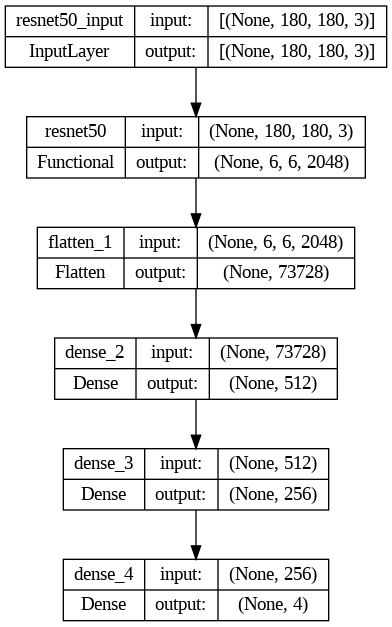

In [ ]:
tf.keras.utils.plot_model(resnet50_model, 'model.png', show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
resnet50_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for Resnet 50 Classifier:-\n')
start_time = time.time()

result = resnet50_model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 20)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Resnet 50 Classifier:-

Epoch 1/20
12/12 [==============================] - 16s 1s/step - loss: 17.4958 - balanced_accuracy: 0.2500 - val_loss: 5.0658 - val_balanced_accuracy: 0.2500
Epoch 2/20
12/12 [==============================] - 7s 606ms/step - loss: 6.3314 - balanced_accuracy: 0.2639 - val_loss: 2.9785 - val_balanced_accuracy: 0.2752
Epoch 3/20
12/12 [==============================] - 7s 572ms/step - loss: 3.5938 - balanced_accuracy: 0.2626 - val_loss: 2.9326 - val_balanced_accuracy: 0.2500
Epoch 4/20
12/12 [==============================] - 6s 522ms/step - loss: 2.2977 - balanced_accuracy: 0.3265 - val_loss: 1.9337 - val_balanced_accuracy: 0.2500
Epoch 5/20
12/12 [==============================] - 6s 528ms/step - loss: 1.8320 - balanced_accuracy: 0.2841 - val_loss: 1.5310 - val_balanced_accuracy: 0.4458
Epoch 6/20
12/12 [==============================] - 6s 535ms/step - loss: 1.4397 - balanced_accuracy: 0.3835 - val_loss: 1.3448 - val_balanced_accuracy: 0.4639
Epoch

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
start_time = time.time()
y_pred1= resnet50_model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

13/13 [==============================] - 4s 266ms/step

Total time(sec) =  3.825073480606079


7/7 [==============================] - 2s 251ms/step
Prediction time(sec) =  2.1135013103485107


Training score =  0.8975
Tesing score =  0.8792857142857143


No of missclassified for class COPD (test data) = 5 
No of missclassified for class Healthy (test data) = 7 
No of missclassified for class Pneumonia (test data) = 5 
No of missclassified for class URTI (test data) = 7 
Total no of missclassified points(test data) =  24
Total % of missclassified points(test data) =  0.12060301507537688


{'COPD': 0, 'Healthy': 1, 'Pneumonia': 2, 'URTI': 3}


Confusion matrix:


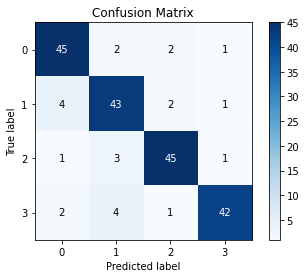



Classification report:-

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.83      0.86      0.84        50
           2       0.90      0.90      0.90        50
           3       0.93      0.86      0.89        49

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.88      0.88      0.88       199

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = resnet50_model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.15)
y_pred = predict_score(y_pred,y_test,weight=0.18)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Resnet_50 = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Googlenet**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
googlenet_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                #    pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

googlenet_model.add(pretrained_model)
googlenet_model.add(tf.keras.layers.Flatten())
googlenet_model.add(tf.keras.layers.Dense(512, activation='relu'))
googlenet_model.add(tf.keras.layers.Dense(256, activation='relu'))
googlenet_model.add(tf.keras.layers.Dense(4, activation='softmax'))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
googlenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               16777728  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 38,712,868
Trainable params: 16,910,084
Non-trainable params: 21,802,784
_________________________________________________________________


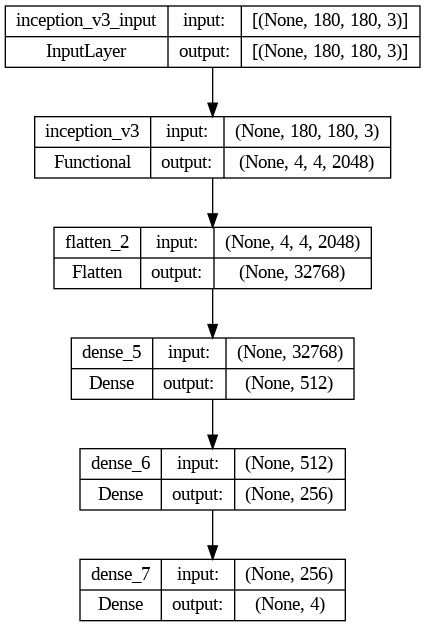

In [ ]:
tf.keras.utils.plot_model(googlenet_model, 'model.png', show_shapes=True)

In [ ]:
googlenet_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for Googlenet Classifier:-\n')
start_time = time.time()

result = googlenet_model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 20)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Googlenet Classifier:-

Epoch 1/20
12/12 [==============================] - 10s 707ms/step - loss: 23.1695 - balanced_accuracy: 0.2995 - val_loss: 8.7275 - val_balanced_accuracy: 0.3864
Epoch 2/20
12/12 [==============================] - 7s 608ms/step - loss: 4.7888 - balanced_accuracy: 0.4047 - val_loss: 4.3452 - val_balanced_accuracy: 0.3998
Epoch 3/20
12/12 [==============================] - 7s 623ms/step - loss: 2.3124 - balanced_accuracy: 0.4917 - val_loss: 3.3278 - val_balanced_accuracy: 0.4716
Epoch 4/20
12/12 [==============================] - 7s 546ms/step - loss: 2.5620 - balanced_accuracy: 0.4493 - val_loss: 2.2844 - val_balanced_accuracy: 0.3976
Epoch 5/20
12/12 [==============================] - 7s 607ms/step - loss: 1.9642 - balanced_accuracy: 0.5353 - val_loss: 1.6065 - val_balanced_accuracy: 0.4883
Epoch 6/20
12/12 [==============================] - 7s 545ms/step - loss: 0.9603 - balanced_accuracy: 0.6447 - val_loss: 1.6780 - val_balanced_accuracy: 0.4434
Ep

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 400 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
start_time = time.time()
y_pred1= googlenet_model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

13/13 [==============================] - 4s 286ms/step

Total time(sec) =  4.09138560295105


7/7 [==============================] - 3s 477ms/step
Prediction time(sec) =  3.54490327835083


Training score =  0.8475
Tesing score =  0.8440816326530612


No of missclassified for class COPD (test data) = 8 
No of missclassified for class Healthy (test data) = 6 
No of missclassified for class Pneumonia (test data) = 8 
No of missclassified for class URTI (test data) = 9 
Total no of missclassified points(test data) =  31
Total % of missclassified points(test data) =  0.15577889447236182


{'COPD': 0, 'Healthy': 1, 'Pneumonia': 2, 'URTI': 3}


Confusion matrix:


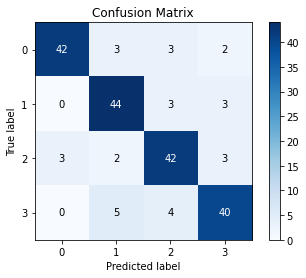



Classification report:-

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.81      0.88      0.85        50
           2       0.81      0.84      0.82        50
           3       0.83      0.82      0.82        49

    accuracy                           0.84       199
   macro avg       0.85      0.84      0.84       199
weighted avg       0.85      0.84      0.84       199

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = googlenet_model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.22)
y_pred = predict_score(y_pred,y_test,weight=0.24)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Googlenet = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**GBDT**

In [ ]:
import numpy as np
def preprocess_img(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(50, 50, 3), color_mode='rgb')
    x = tf.keras.preprocessing.image.img_to_array(img)
    return np.array(x).ravel()

In [ ]:
from tqdm.auto import tqdm
train_data = []
for i in tqdm(os.listdir('/content/train_test_split/train')):
    for j in os.listdir('/content/train_test_split/train/'+i):
        img_path = '/content/train_test_split/train/'+i+'/'+j
        data = preprocess_img(img_path).tolist()
        data.extend([i])
        train_data.append(data)

test_data = []
for i in tqdm(os.listdir('/content/train_test_split/val')):
    for j in os.listdir('/content/train_test_split/val/'+i):
        img_path = '/content/train_test_split/val/'+i+'/'+j
        data = preprocess_img(img_path).tolist()
        data.extend([i])
        test_data.append(data)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
len(train_data),len(test_data)

(400, 199)

In [ ]:
len(train_data[0])

7501

In [ ]:
emb_col = list(map(lambda x:'pix_'+str(x+1),range(50*50*3)))
col_names = emb_col + ['Class']

import pandas as pd
train_data = pd.DataFrame(data = train_data,columns = col_names)
test_data = pd.DataFrame(data = test_data,columns = col_names)

In [ ]:
train_data.shape,test_data.shape

((400, 7501), (199, 7501))

In [ ]:
X_train = train_data.loc[:,emb_col]
y_train = train_data[['Class']]

X_test = test_data.loc[:,emb_col]
y_test = test_data[['Class']]

In [ ]:
X_train.shape,X_test.shape

((400, 7500), (199, 7500))

In [ ]:
y_train.shape,y_test.shape

((400, 1), (199, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label = y_train['Class'].unique().tolist()

Results for GradientBoosting Classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  22.880523681640625
Prediction time(sec) =  0.010100126266479492


********************************************************************************

Training score =  0.8274999999999999
Tesing score =  0.8092857142857143


********************************************************************************


No of missclassified for class URTI (test data) = 9 
No of missclassified for class Pneumonia (test data) = 9 
No of missclassified for class COPD (test data) = 13 
No of missclassified for class Healthy (test data) = 7 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  38
Total % of missclassified points (test data) =  19.09547738693467


********************************************************************************


Confusion matrix:


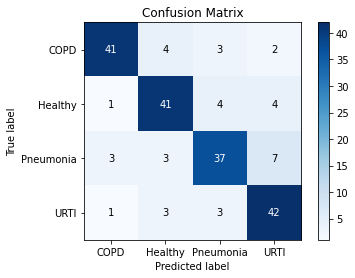



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

        COPD       0.89      0.82      0.85        50
     Healthy       0.80      0.82      0.81        50
   Pneumonia       0.79      0.74      0.76        50
        URTI       0.76      0.86      0.81        49

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199



********************************************************************************


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()

print('Results for GradientBoosting Classifier:-\n')
start_time = time.time()
gbdt.fit(X_train,y_train)
gbdt_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',gbdt_time)

y_pred1 = gbdt.predict(X_train)

start_time = time.time()
y_pred = gbdt.predict(X_test)
gbdt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',gbdt_time2)
y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.25)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.28)
cm_gbdt = confusion_matrix(y_test, y_pred)
gbdt_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_gbdt = balanced_accuracy_score(y_train,y_pred1)
acc2_gbdt = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_gbdt)
print('Tesing score = ',acc2_gbdt)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_gbdt[i])-cm_gbdt[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',gbdt_miss)
print('Total % of missclassified points (test data) = ',(gbdt_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 


GBDT = [acc1_gbdt, acc2_gbdt, gbdt_miss, gbdt_miss/len(y_test), gbdt_time, gbdt_time2]

**Resnet-50 vs Resnet-34**

In [ ]:
import pandas as pd
s1 = [Resnet_34,Resnet_50]
s2 = ['Resnet_34','Resnet_50']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [ ]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Resnet_34,0.8525,0.838980,32,16.080402,126.830548,2.168423
1,Resnet_50,0.8975,0.879286,24,12.060302,152.157877,2.113501


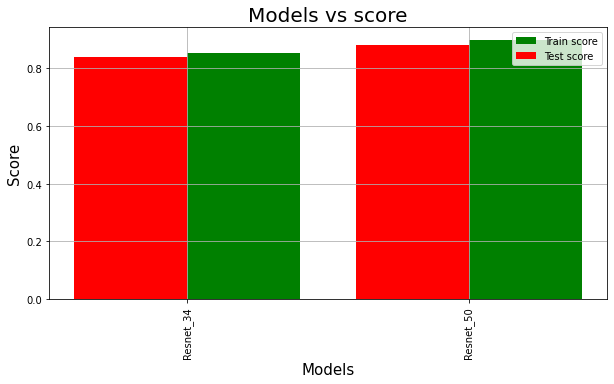

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

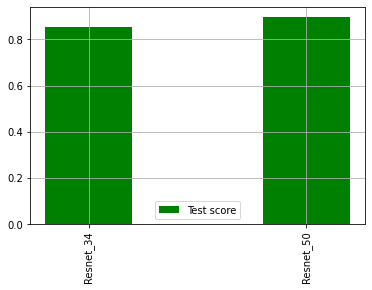

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Resnet-50 vs Resnet-18**

In [ ]:
import pandas as pd
s1 = [Resnet_18,Resnet_50]
s2 = ['Resnet_18','Resnet_50']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [ ]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Resnet_18,0.8400,0.819184,36,18.090452,67.370822,2.183788
1,Resnet_50,0.8975,0.879286,24,12.060302,152.157877,2.113501


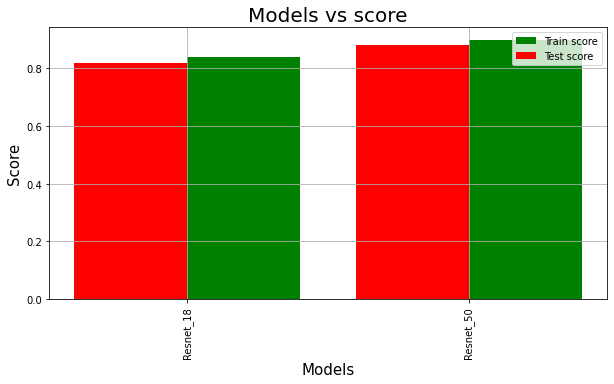

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

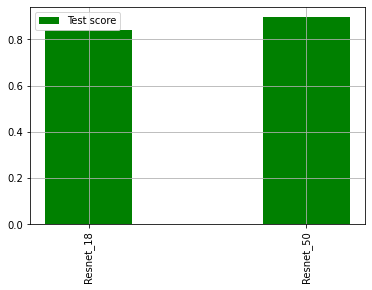

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Resnet-50 vs Googlenet**

In [ ]:
import pandas as pd
s1 = [Resnet_50,Googlenet]
s2 = ['Resnet_50','Googlenet']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [ ]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Resnet_50,0.8975,0.879286,24,12.060302,152.157877,2.113501
1,Googlenet,0.8475,0.844082,31,15.577889,95.258111,3.544903


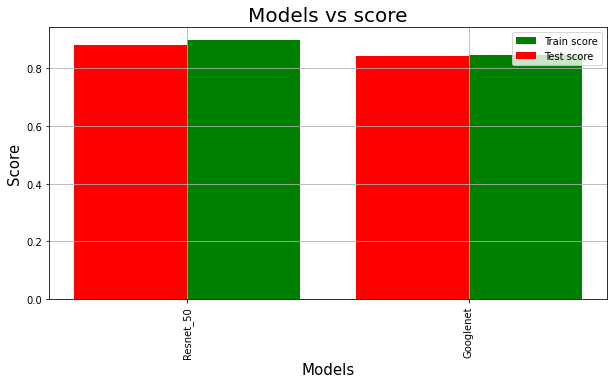

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

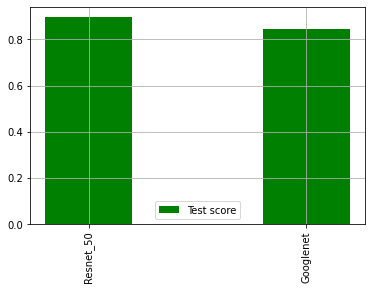

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Resnet-50 vs GBDT**

In [ ]:
import pandas as pd
s1 = [Resnet_50,GBDT]
s2 = ['Resnet_50','GBDT']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [ ]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Resnet_50,0.8975,0.879286,24,12.060302,152.157877,2.113501
1,GBDT,0.8275,0.809286,38,19.095477,22.880524,0.010100


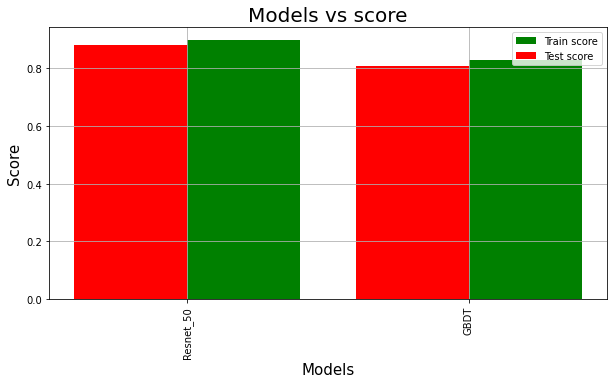

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

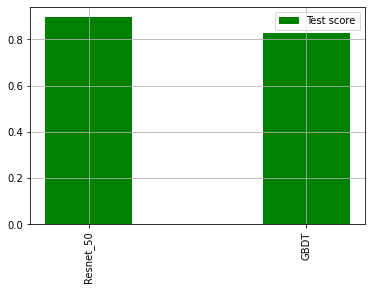

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Final Comparison**

In [ ]:
import pandas as pd
s1 = [Resnet_18,Resnet_34,Resnet_50,Googlenet,GBDT]
s2 = ['Resnet_18','Resnet_34','Resnet_50','Googlenet','GBDT']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [ ]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Resnet_18,0.8400,0.819184,36,18.090452,67.370822,2.183788
1,Resnet_34,0.8525,0.838980,32,16.080402,126.830548,2.168423
2,Resnet_50,0.8975,0.879286,24,12.060302,152.157877,2.113501
3,Googlenet,0.8475,0.844082,31,15.577889,95.258111,3.544903
4,GBDT,0.8275,0.809286,38,19.095477,22.880524,0.010100


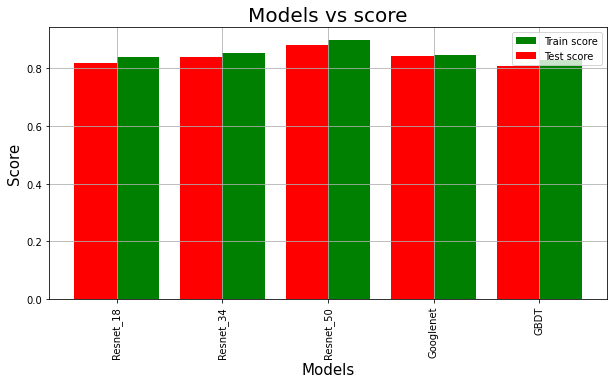

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

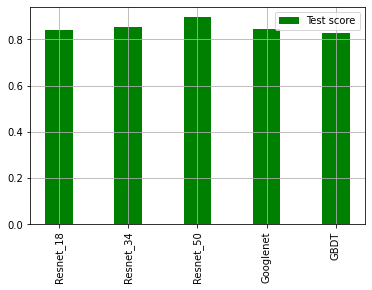

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()